In [1]:
import tensorflow as tf

2022-02-22 15:38:58.464222: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

2022-02-22 15:39:04.320082: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-22 15:39:04.323021: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-22 15:39:04.350677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 15:39:04.351263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-22 15:39:04.351287: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-22 15:39:04.354236: I tensorflow/stream_executor/platform/default/dso_loade

In [9]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [606]:
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [10]:
# konlpy 설치
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 81.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 106.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.0/449.0 KB 60.4 MB/s eta 0:00:00


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [244]:
train=pd.read_csv('/home/lab12/data/train_data.csv')
train

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [234]:
test=pd.read_csv('/home/lab12/data/test_data.csv')
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


In [102]:
del train1['index']

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      45654 non-null  object
 1   topic_idx  45654 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 713.5+ KB


In [79]:
from collections import Counter

In [80]:
k=[]
for i in range(0,len(train)):
  a=re.findall('[一-龥]',train['title'][i])
  if len(a)!=0:
    k=[*k,*a]

Counter(k).most_common()[:35]

[('美', 1498),
 ('北', 1329),
 ('中', 795),
 ('朴', 661),
 ('日', 467),
 ('靑', 381),
 ('與', 291),
 ('英', 285),
 ('文', 184),
 ('野', 181),
 ('獨', 138),
 ('伊', 127),
 ('韓', 109),
 ('前', 95),
 ('佛', 92),
 ('檢', 73),
 ('軍', 69),
 ('安', 63),
 ('反', 54),
 ('行', 44),
 ('南', 37),
 ('硏', 27),
 ('故', 25),
 ('外', 24),
 ('亞', 23),
 ('對', 21),
 ('銀', 19),
 ('展', 19),
 ('重', 18),
 ('株', 18),
 ('新', 17),
 ('黃', 16),
 ('企', 14),
 ('詩', 14),
 ('車', 14)]

In [94]:
!pip install hanja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.0/265.0 KB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 KB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 22.4 MB/s eta 0:00:00
  Created wheel for hanja: filename=hanja-0.13.3-py3-none-any.whl size=128426 sha256=ee5496c403570e7f44bb10d48dad1156b9014ae8689bfc0f988e2f195c9b3afd
  Stored in directory: /home/lab12/.cache/pip/wheels/70/08/88/f9cd32ddb92f5c3061cf16f068c842dc558d2f66a9c943b51a
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp37-cp37m-linux_x86_64.whl size=44118 sha256=6e274c80674568743a46f1e1908531c1b581676e2bffd13891ca26c9011c5eaa
  Stored in directory: /home/lab12/.cache/pip/wh

In [97]:
import hanja
from hanja import hangul

# 불용어

In [27]:
from tensorflow.keras.datasets import imdb

In [51]:
import re

In [53]:
print( train1[11] )
cleanText(train1[11][1])

[11, '이란서 최고지도자 모욕 혐의 미국인에 징역 10년 선고', 4]


'이란서 최고지도자 모욕 혐의 미국인에 징역 년 선고'

In [54]:
train_clean = []
for line in train1:
    train_clean.append( [ cleanText(line[1]), int(line[2])] )
train_clean[:2]

[['인천핀란드 항공기 결항휴가철 여행객 분통', 4], ['실리콘밸리 넘어서겠다구글 조원 들여 전역 거점화', 4]]

In [59]:
%cd '/home/lab12/data'
!wget https://bab2min.tistory.com/attachment/cfile2.uf@241D6F475873C2B1010DEA.txt
!mv cfile2.uf@241D6F475873C2B1010DEA.txt stopwords.txt

/home/lab12/data
--2022-02-22 17:15:04--  https://bab2min.tistory.com/attachment/cfile2.uf@241D6F475873C2B1010DEA.txt
Resolving bab2min.tistory.com (bab2min.tistory.com)... 211.249.222.33
Connecting to bab2min.tistory.com (bab2min.tistory.com)|211.249.222.33|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://t1.daumcdn.net/cfile/tistory/241D6F475873C2B101?download [following]
--2022-02-22 17:15:04--  https://t1.daumcdn.net/cfile/tistory/241D6F475873C2B101?download
Resolving t1.daumcdn.net (t1.daumcdn.net)... 23.33.33.201, 23.33.33.177, 2600:140b:400::1721:208b, ...
Connecting to t1.daumcdn.net (t1.daumcdn.net)|23.33.33.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2171 (2.1K) [text/plain]
Saving to: ‘cfile2.uf@241D6F475873C2B1010DEA.txt’

cfile2.uf@241D6F475 100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-02-22 17:15:04 (406 MB/s) - ‘cfile2.uf@241D6F475873C2B1010DEA.txt’ saved [2171/2171]



In [60]:
stopwords = []
with open('./stopwords.txt') as f:
    stopwords = [ line.split('\t')[0] for line in f.readlines() ]
stopwords[:10]

['이', '있', '하', '것', '들', '그', '되', '수', '이', '보']

In [62]:
# 한글에서 사용할 수 있는 형태소 분석기
from konlpy.tag import Kkma, Komoran, Okt, Hannanum, Mecab

In [66]:
kkma = Kkma()
komoran = Komoran()
han = Hannanum()

okt = Okt()

In [67]:
print( okt.morphs( train_clean[0][0] ) )
print( okt.morphs( train_clean[0][0], stem=True ) )
print( okt.morphs( train_clean[0][0], stem=True, norm=True ) )

['인천', '핀란드', '항공기', '결항', '휴가', '철', '여행객', '분통']
['인천', '핀란드', '항공기', '결항', '휴가', '철', '여행객', '분통']
['인천', '핀란드', '항공기', '결항', '휴가', '철', '여행객', '분통']


In [68]:
train_token = []
for line in train_clean:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train_token.append( [pre, line[1]] )

In [76]:
train_token[100:400]

[[['홍콩', '경찰', '송환', '시위', '입법', '의원', '추가', '체포', '하다', '석방', '종합'], 4],
 [['통일', '차관', '내일', '이산', '상봉', '시설', '보수', '점검', '금강산'], 6],
 [['오만하다', '유조선', '피습', '관련', '최대한', '자제', '하다'], 4],
 [['원조', '친박', '에서', '정부', '입각', '까지', '진영', '행안', '장관', '후보자'], 6],
 [['기업', '강제', '기술이전', '피해', '주장', '무근'], 4],
 [['파키스탄', '아내', '대상', '가볍다', '체벌', '허용', '추진'], 4],
 [['대통령', '유엔', '사무', '총장', '회담', '평창', '이후', '찾아오다', '종합'], 6],
 [['연세대', '고려대', '대학', '축구', '리그', '역서', '정면', '대결'], 5],
 [['여야', '초선', '당선인', '찬회', '박관용', '선의', '종말'], 6],
 [['평양', '축구', '학교', '설립', '개교'], 6],
 [['공화', '전당대회', '사흘', '미국', '우선', '합창'], 4],
 [['정부', '탈핵', '정책', '비판', '문서', '위장', '악성코드', '유포', '돼다'], 6],
 [['팰리스', '아스널', '완승', '이청용', '결장'], 5],
 [['대만', '총통', '선거', '막판', '관전', '포인트', '대학생', '귀향', '투표'], 4],
 [['슈퍼', '루키', '강백호', '남다', '경기', '신인', '홈런', '신기록', '도전'], 5],
 [['이라크', '남부', '바스', '라서', '반정부', '시위', '부상', '항구', '차질'], 4],
 [['행정부', '아프간', '병력', '감축', '역할', '확대', '놓다', '이견'], 4],
 [['야당', '대표', '노딜', '브렉', 

In [71]:
import pickle

In [72]:
!pwd

/home/lab12/data


In [73]:
with open('./nsmc_train_preprocess.pk', 'wb') as f:
    pickle.dump(train_token, f)

1번 6번 토픽

# 1번 6번 토픽 전처리

## 1번

In [495]:
train_1=train[train.topic_idx==1]
train_1[500:550]

,index,title,topic_idx
4205,4205,NH투자 KTG 주가·배당 매력 두드러져,1
4208,4208,SK텔레콤 T괌·사이판패스 본격 시행,1
4215,4215,KT 아현화재 통신대란 1년…5G시대 재난 대응책 더 고민해야,1
4216,4216,STX엔진 엔진 부품판매·기자재 공급 시장 진출,1
4217,4217,특징주 성장성 특례 1호 셀리버리 코스닥 첫날 공모가 상회종합,1
4221,4221,특징주 셀트리온 첫 26만원 돌파종합,1
4222,4222,삼성바이오 비중 상위 5개 펀드 한달새 14% 손실,1
4241,4241,2025년까지 일자리 55만개…혁신성장동력 13개 선정,1
4244,4244,한은 금리 인상에 이자 부담↑…투자보다 부채관리 우선종합,1
4248,4248,소재부품 상반기 수출 1천218억달러…전년比 9.2%↓,1


In [496]:
train_1.reset_index(inplace=True)

한자 파악

In [497]:
train_han1 = []
for i in range(len(train_1)):
    result = re.findall("[一-龥]", train_1.title[i])
    if len(result) > 0:
        train_han1.append([i, result])
train_han1

[[17, ['中', '企']],
 [32, ['日']],
 [57, ['中']],
 [67, ['中']],
 [68, ['中']],
 [73, ['檢']],
 [90, ['美', '日']],
 [110, ['中']],
 [111, ['中', '企']],
 [148, ['百']],
 [209, ['英']],
 [213, ['銀']],
 [226, ['比']],
 [227, ['獨']],
 [239, ['重']],
 [289, ['中']],
 [290, ['銀']],
 [328, ['中']],
 [330, ['獨']],
 [334, ['銀']],
 [396, ['英']],
 [399, ['韓']],
 [419, ['美']],
 [448, ['獨']],
 [509, ['比']],
 [534, ['中']],
 [555, ['美']],
 [572, ['銀']],
 [575, ['獨']],
 [600, ['美']],
 [612, ['美']],
 [632, ['中']],
 [650, ['株']],
 [652, ['車']],
 [686, ['美']],
 [687, ['中', '企']],
 [720, ['檢']],
 [758, ['證']],
 [760, ['新']],
 [763, ['詩']],
 [771, ['銀']],
 [782, ['韓']],
 [791, ['韓', '美', '中']],
 [797, ['中', '企']],
 [813, ['株']],
 [820, ['株']],
 [830, ['中', '企']],
 [900, ['美']],
 [967, ['美']],
 [975, ['證']],
 [1010, ['重']],
 [1018, ['硏']],
 [1033, ['弗']],
 [1040, ['株']],
 [1041, ['韓']],
 [1058, ['日']],
 [1100, ['檢']],
 [1138, ['銀']],
 [1156, ['新']],
 [1172, ['中']],
 [1178, ['證', '日']],
 [1186, ['株']],
 [1250, ['中', '企']],

In [498]:
index1 = []
for i in range(0, len(train_han1)):
    index1.append(train_han1[i][0])
    print(train_1.title[index[i]])
print(len(index1))

中企경기전망지수 3개월째 하락…최대애로는 인건비 상승
윤호중 日수출규제로 한일 항공노선 운항 최대 34% 축소 전망
한미반도체 中업체와 26억 규모 반도체 장비 공급계약
소프트뱅크벤처스 3천400억 펀드 결성…中스타트업에 투자
코스피 1900선 위태…中불안에 환율 영향도종합
檢 롯데 비자금 2차 압수수색…롯데건설 등 계열사 10여곳
NHN 기업 클라우드 시장 본격 공략…美·日도 진출
삼성 스마트폰 애플·中3사 사이 샌드위치…세계 1위 내줘종합2보
기보 경영전략워크숍 개최…中企 성장지원에 역량집중
롯데百 6일부터 봄 정기세일…300여 품목 최대 80% 할인
英 연봉킹 CEO는 온라인 도박업체 사장…4천900억원 벌어
우리銀 뉴욕서 10조원 손배소 피소…소송사기 엄중대응종합
올해 공공택지 분양물량 작년比 34.8% 감소
獨 전기차 보조금 확대…기후변화대응 2023년까지 70조 투자종합
현대重 연말 1조5천억 선박 수주…이란 등에서 총 12척
토니모리 종속회사 中 공장 신축에 230억원 투자
KEB하나銀 최저임금 인상 영향 소상공인에 금융 지원
LS전선 中자회사 지분 LS EV 코리아에 현물출자
잘나가던 獨경제 성장률 전망치 뚝…제조업 수주도 빨간불종합
배당 유보해 투자한다더니…씨티銀 1천억원 배당 결정
브렉시트 우려 탓…닛산 英 투자계획 철회 움직임
살 곳이 없다 세계 집값 10년새 50%↑…韓 30년새 360%↑
한투증권 美 금리인상 내년 상반기 종료 가능성
獨 항공대란 야기했던 보안검색직원 임금협상 타결
소재부품 상반기 수출 1천218억달러…전년比 9.2%↓
특징주 中 기업 골든센츄리 상장 첫날 약세종합
화웨이 1분기 영업익 3배 뛰었지만…美제재로 전망 흐림
내달 1일부터 4개 지방銀서도 사잇돌 중금리 대출
한숨돌린 獨 경제…8월 산업생산 0.3% 증가
삼성전자 美서 존경받는 기업 3위…애플은 100위밖
美증시 강세에 코스피 상승…나흘 만에 2090대 마감종합
中 부동산 불황 쇼크…관련기업 주가 하루 80% 폭락
삼성바이오 삼성그룹株 공매도 거래 비중 상승폭 

248개의 행에 한자 존재

영어 파악

In [499]:
train_eng1 = []
for i in range(len(train_1)):
    result = re.findall("[a-z]|[A-Z]", train_1.title[i])
    if len(result) > 0:
        train_eng1.append([i, result])
train_eng1

[[6, ['K', 'G', 'P']],
 [7, ['S', 'K']],
 [8, ['N', 'H', 'N']],
 [13, ['A', 'l', 'l', 'W', 'a', 'y', 's']],
 [15, ['G', 'S']],
 [21, ['N', 'H']],
 [26, ['S', 'K', 'S']],
 [30, ['L', 'G', 'U', 'S', 'K', 'T', 'K', 'T']],
 [37, ['N', 'H']],
 [41, ['K', 'P', 'M', 'G', 'I', 'P', 'O']],
 [42, ['S', 'K', 'E', 'L', 'B']],
 [43, ['S', 'L', 'G', 'V']],
 [47, ['N', 'P', 'L']],
 [48, ['T', 'V']],
 [49, ['G', 'I', 'T']],
 [53, ['K', 'B']],
 [54, ['K', 'B']],
 [55, ['L', 'G', 'C', 'N', 'S', 'S', 'G', 'M', 'O', 'U']],
 [58, ['N', 'H', 'N']],
 [59, ['S', 'K', 'T', 'A', 'I']],
 [61, ['K', 'T']],
 [65, ['L', 'H']],
 [66, ['I', 'T']],
 [70, ['S']],
 [71, ['C', 'E', 'O']],
 [74, ['L', 'S']],
 [77, ['G']],
 [86, ['N', 'H']],
 [90, ['N', 'H', 'N']],
 [96, ['N', 'H']],
 [98, ['L', 'G']],
 [99, ['K', 'A', 'I', 'S', 'T']],
 [103, ['K', 'T']],
 [104, ['I', 'P', 'O']],
 [105, ['S', 'M']],
 [109, ['B']],
 [112, ['S', 'K', 'T', 'G', 'S', 'A']],
 [115, ['L', 'G', 'M', 'A']],
 [119, ['S', 'K', 'T', 'T']],
 [122, ['J

## 6번

In [500]:
train_6=train[train.topic_idx==6]
train_6

,index,title,topic_idx
43,43,김영남 우리 민족 위상 과시…뜨거운 분위기 이어가길,6
48,48,적극행정 추진전략 및 성과공유대회 참석한 이낙연 총리,6
49,49,朴대통령 한일 합의에 소녀상 언급없어…선동하면 안돼,6
50,50,민주 국회의원 재보선 4곳 후보 공모에 7명 신청,6
53,53,현행 헌법과 다른 점은 ②지방자치·경제민주화 개념 강화,6
...,...,...,...
45590,45590,박지원 책임있는 위치에 있는 사람들 청문회 증인대 세워야,6
45603,45603,北 고난의 행군 이어 군자리정신까지…대북제재 효과,6
45611,45611,北 연이은 도발에 靑 신속·단호 대응…내부선 수위조절 고민도,6
45627,45627,정의당 박근혜 역사의 대죄인…징역 24년 턱없이 부족,6


In [501]:
train_6.reset_index(inplace=True)

한자 파악

In [502]:
train_han6 = []
for i in range(len(train_6)):
    result = re.findall("[一-龥]", train_6.title[i])
    if len(result) > 0:
        train_han6.append([i, result])
train_han6

[[2, ['朴']],
 [6, ['靑']],
 [8, ['靑']],
 [11, ['北']],
 [12, ['朴']],
 [16, ['北']],
 [21, ['朴']],
 [22, ['美']],
 [23, ['靑']],
 [24, ['行']],
 [25, ['文']],
 [28, ['北']],
 [33, ['北']],
 [34, ['靑', '中']],
 [35, ['朴']],
 [37, ['北']],
 [39, ['北']],
 [41, ['北']],
 [42, ['朴']],
 [47, ['北']],
 [50, ['北']],
 [53, ['與']],
 [56, ['靑']],
 [58, ['朴']],
 [60, ['朴', '北']],
 [62, ['北', '美']],
 [63, ['文', '日']],
 [64, ['韓', '美', '北']],
 [65, ['文']],
 [67, ['靑']],
 [70, ['野']],
 [71, ['朴']],
 [72, ['北']],
 [73, ['與']],
 [74, ['文']],
 [75, ['日', '韓']],
 [78, ['朴']],
 [79, ['朴']],
 [80, ['北']],
 [86, ['朴', '發']],
 [87, ['中']],
 [90, ['北']],
 [91, ['朴']],
 [97, ['北']],
 [98, ['文']],
 [100, ['檢']],
 [101, ['北']],
 [102, ['朴']],
 [103, ['北', '美']],
 [108, ['朴']],
 [110, ['檢']],
 [111, ['朴', '中']],
 [118, ['北']],
 [121, ['北']],
 [122, ['野']],
 [123, ['靑', '朴']],
 [124, ['朴']],
 [125, ['文']],
 [126, ['野']],
 [127, ['靑']],
 [129, ['文', '北']],
 [130, ['與', '小']],
 [131, ['朴']],
 [132, ['與']],
 [134, ['北']],
 [135, [

In [503]:
index6 = []
for i in range(0, len(train_han6)):
    index6.append(train_han6[i][0])
    print(train_6.title[index[i]])
len(index6)

촛불민심 받들어 국정운영…촛불 2돌 맞는 문대통령
오신환 국회정상화 진전된 협상 가능…주말전후 회동 조율
본회의 출석한 염동열
우상호 거부권 행사한다면 정치적 의도…靑의 정쟁유발 우려
패럴림픽 김정숙 여사 아이스하키 관람…장애인스포츠 많이 알려지길
與 예비후보자 부정부패·혐오발언·젠더폭력 불이익 서약서
IMO·ITU 北 탄도미사일 발사 관련한 통보 없어종합
유시민 檢압수수색 심각한 오버…조국 법 위반 한개도 없어종합
朴대통령 中 북핵 불용의지 실제 조치로 연결돼야
민주 당직자 대상 공공기관 수요조사 없었다
SNS돋보기 북 고위급 태영호 귀순…탈북할 수밖에
트럼프 이민자 열악 처우 논란에 그들이 있던 곳보단 낫다
한미일 북핵대표 뉴욕서 협의…3국 공조방안 논의종합
이정현 朴대통령에 최순실 조속 귀국·적극 수사 건의속보
문 대통령 장성 진급자들에 삼정검 수여…신뢰받는 軍 이끌라
유진벨재단 北보건성 방북일정 연기 통보해 와
인사말 하는 박양우 장관
웃음 짓는 문 대통령과 임종석 비서실장
윤소하 원내대표 축사 듣는 해외 외신 아시아 편집장들
유엔 北 김정은 직함 당 제1비서→위원장 변경
與 비대위 혁신형 관리형…중진들 의견 팽팽종합
더민주·국민의당 주말 광주 경선 레이스 불꽃
노회찬 BH가 흡족해한다 법원행정처 문서 은폐 의혹
전인범 5·18 발언 광주 5·18단체·지역 정치권까지 반발
여야 의원들 미 대선은 어떻게
특정후보 찍어 달라…문자 보낸 공무원 항소심도 벌금형
홍용표 김정은 새로운 전략 없이 유훈에 의존
신년사 손학규 다당제·합의제로 희망 드리는 정치 실천
두 野 공조 양적완화·어버이연합 쌍끌이 대여공세
고 노회찬 의원 조문하는 이동섭 의원
국방부 자료 유출돼도 적 사용못하게 암호화…국방망 해킹대책
北 서울겨냥 포사격연습 의도는…우리군 정밀타격훈련 대응용종합
文대통령 CEPA로 교역 증대할 것 조코위 양국 경제해방 상징
朴대통령여야대표 회동에 안보실장·외교·통일장관 첫 배석
남북한 ICT 교류협력 심포지엄
속보 文대통령 정세균 후보자 국민께 신뢰와 안정감 드

2784

한자 2784개의 행에 존재

영어 파악

In [504]:
train_eng6 = []
for i in range(len(train_6)):
    result = re.findall("[a-z]|[A-Z]", train_6.title[i])
    if len(result) > 0:
        train_eng6.append([i, result])
train_eng6

[[15, ['A', 'P', 'E', 'C']],
 [36, ['D']],
 [41, ['I', 'M', 'O']],
 [62, ['D']],
 [79, ['v', 's']],
 [80, ['U', 'F', 'G']],
 [82, ['T', 'V']],
 [90, ['I', 'M', 'O', 'I', 'T', 'U']],
 [92, ['M', 'B']],
 [151, ['T', 'K']],
 [180, ['K', 'B', 'S']],
 [185, ['T', 'F']],
 [197, ['I', 'T', 'F']],
 [201, ['D']],
 [209, ['S', 'N', 'S']],
 [223, ['M', 'O', 'U']],
 [242, ['D']],
 [248, ['N', 'Y', 'T']],
 [255, ['D']],
 [294, ['A', 'S', 'E', 'M']],
 [307, ['G', 'P']],
 [335, ['T', 'V']],
 [350, ['D']],
 [354, ['D']],
 [365, ['N', 'S', 'C']],
 [386, ['I', 'C', 'B', 'M']],
 [419, ['B', 'H']],
 [431, ['B']],
 [433, ['v', 's']],
 [434, ['V', 'O', 'A']],
 [436, ['U']],
 [489, ['D', 'v', 's']],
 [501, ['D']],
 [504, ['v', 's']],
 [517, ['M', 'B']],
 [518, ['N', 'K']],
 [533, ['K']],
 [540, ['G', 'D', 'P']],
 [541, ['A', 'S', 'E', 'M']],
 [571, ['S', 'L', 'B', 'M']],
 [611, ['D']],
 [613, ['D']],
 [614, ['D']],
 [636, ['Y', 'S']],
 [639, ['I', 'O', 'C']],
 [645, ['g']],
 [650, ['C', 'E', 'P', 'A']],
 [65

# 함수 생성 (불용어 처리)

In [505]:
# 영어
def eng_chg(text):
    import re
    
    text = re.sub("IT", "정보기술", text)
    text = re.sub("AI", "인공지능", text)
    text = re.sub("MWC", "모바일박람회", text)
    text = re.sub("IoT", "사물인터넷", text)
    text = re.sub("VR", "가상현실", text)
    text = re.sub("CES", "소비자 가전 전시회", text)
    text = re.sub("TV", "티비", text)
    text = re.sub("SNS", "소셜 네트워크 서비스", text)
    text = re.sub("OTT", "다시보기 서비스", text)
    text = re.sub("MIT", "엠아이티 대학교", text)
    text = re.sub("QLED", "디스플레이", text)
    text = re.sub("OLED", "디스플레이", text)
    text = re.sub("DNA", "유전자", text)
    text = re.sub("IPO", "주식공매", text)
    text = re.sub("IDC", "인터넷데이터센터", text)
    text = re.sub("ECB", "유럽중앙은행", text)
    text = re.sub("FOMC", "연방공개시장위원회", text)
    text = re.sub("MOU", "양해각서", text)
    text = re.sub("FA", "자유계약선수제도", text)
    text = re.sub("IPU", "국제의회연맹", text)
    
    # 토픽 =1
    text = re.sub("M＆A", "기업 인수 및 합병", text) #500:550 4511행
    text = re.sub("BW", "신주인수권부 사채", text)
    text = re.sub("DLF", "파생결합펀드", text)
    text = re.sub("MMF", "초단기금융상품", text)
    text = re.sub("FAO", "국제연합식량농업기구", text)
    text = re.sub("2M", "해운동맹", text)
    text = re.sub("CB", "전환사채", text)
    text = re.sub("KSSQI", "한국서비스품질지수", text)
    text = re.sub("DSR", "총부채원리금상환비율", text)
    text = re.sub("MSCI", "모건스탠리캐피털인터내셔널 지수", text)
    text = re.sub("FTSE", "파이낸셜타임스 스톡익스체인지", text)
    text = re.sub("EPL", "유럽프리미어리그", text)
    text = re.sub("SKB", "에스케이브로드밴드", text)
    text = re.sub("DLS", "파생결합증권", text)
    text = re.sub("GDP", "국내총생산", text)
    text = re.sub("ESS", "에너지 저장 시스템", text)
    text = re.sub("PTT", "푸시 투 토크", text)
    text = re.sub("BP", "영국국영석유회사", text)
    text = re.sub("MA", "인수합병", text)
    text = re.sub("ICT", "정보통신기술", text)
    text = re.sub("ODM", "제조업자 개발생산", text)
    text = re.sub("DSC", "융복합형 디지털 스페이스 컨버전스 ", text)
    text = re.sub("인베스트먼트", "투자", text)
    text = re.sub("ETF", "상장지수펀드", text)
    text = re.sub("MWC", "회원창고형 도소매업", text)
    text = re.sub("WTI", "서부텍사스유", text)
    text = re.sub("RD", "연구개발", text)
    text = re.sub("주택경기실사지수HBSI", "주택경기실사지수", text)
    text = re.sub("CD", "양도성예금증서", text)
    text = re.sub("PB", "금융 포트폴리오 전문가", text)
    text = re.sub("LNG", "액화천연가스", text)
    text = re.sub("IPS", "실내 위치 추적 서비스", text)
    text = re.sub("FB", "메타플랫폼", text)
    text = re.sub("ELS", "주가연계증권", text)
    text = re.sub("ELB", "주가연계파생결합사채", text)
    text = re.sub("PG", "페이먼트 게이트웨이", text)
    text = re.sub("ISA", "개인종합자산관리계좌", text)
    text = re.sub("KDI", "한국개발연구원", text)
    text = re.sub("ETP", "주식 거래", text)
    text = re.sub("ETF", "상장지수펀드", text)
    text = re.sub("ICC", "국제상업회의소", text)
    text = re.sub("CBSI", "경기실사지수", text)
    text = re.sub("BOE", "영국중앙은행", text)
    text = re.sub("FT", "파이넨셜타임즈", text)
    text = re.sub("MS", "마이크로소프트", text)
    text = re.sub("IITPKISTA", "", text)
    text = re.sub("KISA", "한국인터넷진흥원", text)
    text = re.sub("IPAF", "국제공공자산관리기구포럼", text)
    text = re.sub("ETN", "상장지수채권", text)
    text = re.sub("DSR", "총부채원리금상환비율", text)
    text = re.sub("TDF", "은퇴 자산배분 펀드", text)
    text = re.sub("CERCG", " 중국국저에너지화공집단", text)
    text = re.sub("IRP", "개인형 퇴직연금", text)
    text = re.sub("PC", "컴퓨터", text)
    text = re.sub("FDA", "식품의약국", text)
    text = re.sub("CMA", "실적배당 금융상품", text)
    text = re.sub("SW", "소프트웨어", text)
    text = re.sub("ISA", "개인종합자산관리계좌", text)
    text = re.sub("MWC", "모바일 월드 콩그레스", text)
    
    
    # 토픽=6
    
    text = re.sub("IMO", "국제해사기구", text)
    text = re.sub("ITU", "국제전기통신연합", text)
    text = re.sub("TK", "대구 및 경상북도", text)
    text = re.sub("ITF", "국제태권도연맹", text)
    text = re.sub("ASEM", "아시아유럽 정상회의", text)
    text = re.sub("ICBM", "대륙간탄도미사일", text)
    text = re.sub("BH", "청와대", text)
    text = re.sub("MB", "이명박", text)
    text = re.sub("SLBM", "잠수함발사탄도미사일", text)
    text = re.sub("YS", "김영삼", text)
    text = re.sub("IOC", "국제올림픽위원회", text)
    text = re.sub("EAS", "동아시아 정상회의", text)
    text = re.sub("CEPA", "포괄적 경제동반자 협정", text)
    text = re.sub("NLL", "북방한계선", text)
    text = re.sub("NSC", "국가안전보장회의", text)
    text = re.sub("PK", "부산 및 경남", text)
    text = re.sub("SOC", "사회간접자본", text)
    text = re.sub("NGO", "비정부 기구", text)
    text = re.sub("NPDI", "핵 비확산군축 이니셔티브", text)
    text = re.sub("UAE", "아랍에미리트", text)
    text = re.sub("vs", " 대 ", text)
    text = re.sub("FTA", "자유무역협정", text)
    text = re.sub("SCM", "안보협의회의", text)
    text = re.sub("MDL", "군사분계선", text)
    text = re.sub("IDB", "미주개발은행", text)
    text = re.sub("PAC3", "패트리어트 미사일", text)
    text = re.sub("CVID", "북핵 해결의 원칙", text)
    text = re.sub("EEZ", "배타적 경제수역", text)
    text = re.sub("IPC", "국제패럴림픽위원회", text)
    text = re.sub("JP", "김종필 전 국무총리", text)
    text = re.sub("DJ", "김대중", text)
    text = re.sub("DMZ", "비무장지대", text)
    text = re.sub("ODA", "정부개발원조", text)
    text = re.sub("APEC", "아시아태평양경제협력체", text)
    text = re.sub("AU", "아프리카연합", text)
    text = re.sub("GPS", "지피에스", text)
    text = re.sub("IPTV", "아이피티비", text)
    text = re.sub("TV", "텔레비전", text)
    text = re.sub("CB", "전환사채", text)
    
    return text

In [509]:
# 필요없는 단어 지우기
def word_delete(title):
    delete_word = [
        "1보",
        "2보",
        "3보",
        "4보",
        "5보",
        "속보",
        "사진",
        "게시판",
        "주말 N",
        "QA",
        "그래픽",
        "국내",
        "동정",
        "속보",
        "신간",
        "위클리",
        "주간 화제의 뉴스",
        "카드뉴스",
        "팩트체크",
        "WSJ",
        "49호",
        "특징주",
        "VOA",
        "데일리NK",
        "RFA",
        "NHK"
    ]
    for i in delete_word:
        if title.endswith(i) or title.startswith(i):
            title = title.replace(i, "")
    if title.endswith("종합"):
        title = title[:-2]
    title = title.replace("↑", " 증가")
    title = title.replace("↓", " 감소")
    title = title.replace("→", "에서 ")
    title = title.replace("~", "에서 ")
    title = title.replace("...", ". ")
    title = title.replace("·", " 및 ")
    title = title.replace(":", " 대 ")
    title = title.upper()
    return title


def chinese_char(text):
    import re

    # 2단어 이상
    text = re.sub("外人", "외국사람", text)
    text = re.sub("詩人", "시인", text)
    text = re.sub("日人", "일본사람", text)
    if re.search(r"[0-9]人", text):
        text = re.sub("人", "명", text)
    text = re.sub("人", "사람", text)
    text = re.sub("中企", "중소기업", text)
    text = re.sub("令和", "", text)
    text = re.sub("不備", "준비 안되다.", text)
    text = re.sub("印尼", "인도네시아", text)
    text = re.sub("반反", "반대", text)
    text = re.sub("부富", "재산", text)
    text = re.sub("^書香萬里", "", text)
    text = re.sub("最古", "가장 오래된", text)
    text = re.sub("^社告", "", text)
    text = re.sub("對野", "야당", text)
    text = re.sub("氷魚", "", text)
    text = re.sub("眞朴", "박근혜와 친한", text)
    text = re.sub("非朴", "박근혜와 반대", text)
    text = re.sub("破七", "", text)
    text = re.sub("私黨", "개인의 당", text)
    text = re.sub("親朴", "박근혜와 친한", text)
    text = re.sub("邪敎", "사이비 종교", text)
    if re.search("[가-핳]銀", text):
        text = re.sub("銀", "은행", text)
    text = re.sub("非文", "문재인 반대", text)
    text = re.sub("四體", "", text)
    text = re.sub("潘風", "반기문 세력", text)
    text = re.sub("駐英", "영국 주재원", text)
    text = re.sub("高法", "고등법원", text)

    # 개별 단어
    text = re.sub("丁", "정세균", text)  # 사람의 성씨 지금은 정세균 국회의장 #3
    text = re.sub("七", "칠", text)  # 사람이름으로 사용됨 괄호 안에 #1
    text = re.sub("三", "삼", text)  # 3색으로 사용된 괄호 안에 #1
    text = re.sub("中", "중국", text)  # 중국 #771
    text = re.sub("乙", "을", text)  # 차선의 의미, 을말고 다른 단어를 사용하는 것이 좋아보임 #2
    text = re.sub("亞", "아시아", text)  # 23
    text = re.sub(
        "人", "명", text
    )  # 숫자人 : 명, 한글人 : 사람(국석기人), 外人 : 외국인, 詩人 : 시인, 日人 : 일본인 #13
    text = re.sub("仙", "선", text)  # 神仙 : 신선 #1
    text = re.sub("代", "대", text)  # 대를 잇다, 숫자代 : 10대
    text = re.sub("令", "령", text)  # 일본 연호 레이와(令和)에 사용 #1 # 명령에도 사용
    text = re.sub("企", "기", text)  # 中企 : 중소기업 으로 사용됨 모두 다 #14
    text = re.sub("伊", "이탈리아", text)  # 127
    text = re.sub("佛", "프랑스", text)  # 90
    text = re.sub("備", "비", text)  # 不備 : 불비, 갖추지않음
    text = re.sub("先", "먼저", text)  # 7
    text = re.sub("內", "안에", text)  # 지역內 : 어디안에 #1
    text = re.sub("全", "전체", text)  # 3
    text = re.sub("分", "당을 나누다.", text)  # 당을 나누다 #3 分黨: 분당
    text = re.sub("前", "이전", text)  # 이전 #94
    text = re.sub("北", "북한", text)  # 1293
    text = re.sub("千", "천정배", text)  # 국민의 당 천정배 #7
    text = re.sub("協", "협회", text)  # 화합할 협 #2
    text = re.sub("南", "한국", text)  # 36
    text = re.sub("印", "인도", text)  # 印尼 : 인도네시아 # 8(7,1)
    text = re.sub("反", "반대", text)  # 반反 -> 반(反)로 추정 #52
    text = re.sub("古", "오래된", text)  # 最古 -> 최고 # 1
    text = re.sub("史", "역사", text)  # 3
    text = re.sub("告", "고", text)  # 社告 -> 사고(회사광고) 맨 앞에 게시판 처럼 나옴 삭제필 # 2
    text = re.sub("和", "통합", text)  # 1개는 통합 나머지 하나는 令和(일본 연호) # 2
    text = re.sub("四", "4", text)  # 四體 -> 4가지 글씨체 # 1
    text = re.sub("在", "", text)  # 뭔의미인지 모르겠음 在伊 -> 뜻이 안나옴 # 1
    text = re.sub(
        "外", "외", text
    )  # 단독: ~외 몇건 삭제 필, 外人 : 외인 기사 맨앞(게시판)으로 사용 되거나 외국인으로 사용됨 삭제해도 무방할듯 # 24
    text = re.sub("大", "대학교", text)  # 大戰 : 대결, 大寒 : 절기 중 대한
    text = re.sub("妻", "부인", text)  # 1
    text = re.sub("委", "워원회", text)  # 7
    text = re.sub("子", "아들", text)  # 1
    text = re.sub("孫", "손학규", text)  # 손학규 # 14
    text = re.sub("安", "안철수", text)  # 안철수 # 61
    text = re.sub("家", "집안", text)  # 가문 주로 기업뒤에 붙어 사용 # 6
    text = re.sub("富", "재산", text)  # 재산 부富 -> 부(富) # 2
    text = re.sub("寒", "한", text)  # 절기 대한 # 1
    text = re.sub("對", "대결", text)  # 對野 대야 대야당 # 21
    text = re.sub("小", "", text)  # 작다 #1 삭제무방
    text = re.sub("尹", "윤석열", text)  # 윤석열 # 2
    text = re.sub("尼", "", text)  # 인도네시아 뒷 글자 # 2
    text = re.sub("展", "전시회", text)  # 19
    text = re.sub("山", "산", text)  # 1
    text = re.sub("島", "섬", text)  # 1
    text = re.sub("崔", "최순실", text)  # 최순실 # 4
    text = re.sub("州", "도시", text)  # 미국의 주, 시나 도시로 변경 # 4
    text = re.sub("巨", "큰", text)  # 巨野 거야(큰야당) 로 사용 # 2
    text = re.sub("市", "도시", text)  # 도시 # 1
    text = re.sub("式", "방식", text)  # 방법 # 1
    text = re.sub("弗", "달러", text)  # 돈, 달러 # 8
    text = re.sub("强", "강하다", text)  # 1
    text = re.sub("後", "뒤", text)  # 4
    text = re.sub("心", "마음", text)  # 4
    text = re.sub("情", "정", text)  # 1
    text = re.sub("惡", "악", text)  # 2
    text = re.sub("戰", "전투", text)  # 大戰로 사용됨 모두 # 2
    text = re.sub("政", "정부", text)  # 1
    text = re.sub("故", "", text)  # 죽은 사람 삭제해도 될듯 # 25
    text = re.sub("敎", "종교", text)  # 1
    text = re.sub("文", "문재인", text)  # 181
    text = re.sub("料", "요금", text)  # 1
    text = re.sub("新", "새로운", text)  # 17
    text = re.sub("日", "일본", text)  # 460
    text = re.sub("書", "서", text)  # 書香萬里 로 기사 제목 앞에 사용됨(게시판) # 2
    text = re.sub(
        "曺", "조국 법무부장관", text
    )  # 조국 # 11 조국이라는 이름이 나라라는 뜻이 있을 수 있어 다른 방법의 치환이 필요해 보임
    text = re.sub("最", "최", text)  # 最古 # 1
    text = re.sub("月", "한 달", text)  # 5
    text = re.sub("朴", "박근혜", text)  # 박근혜 # 659
    text = re.sub("株", "주식", text)  # 18
    text = re.sub("核", "핵폭탄", text)  # 3
    text = re.sub("案", "안건", text)  # 2
    text = re.sub("機", "기계", text)  # 1
    text = re.sub("檢", "검찰", text)  # 73
    text = re.sub("比", "대비", text)  # 12
    text = re.sub("氣", "기", text)  # 2
    text = re.sub("氷", "빙", text)  # 氷魚 삭제해도 될듯 # 1
    text = re.sub("江", "강", text)  # 1
    text = re.sub("法", "법", text)  # 7
    text = re.sub("洪", "홍경영", text)  # 정치인 # 2
    text = re.sub("海", "해", text)  # 西海 서해 # 1
    text = re.sub("港", "항구", text)  # 1
    text = re.sub("湖", "호수", text)  # 1
    text = re.sub("潘", "반기문", text)  # 8
    text = re.sub("無", "없다", text)  # 9
    text = re.sub("煎", "전", text)  # 花煎 화전 # 1 삭제
    text = re.sub("燈", "조명", text)  # 2
    text = re.sub("父", "아버지", text)  # 3
    text = re.sub("獨", "독일", text)  # 137
    text = re.sub("王", "왕", text)  # 1
    text = re.sub("現", "현재", text)  # 1
    text = re.sub("生", "삶", text)  # 1
    text = re.sub("申", "신", text)  # 2 # 삭제도 가능
    text = re.sub("男", "남자", text)  # 11
    text = re.sub("發", "발생", text)  # 7
    text = re.sub("百", "백화점", text)  # 6
    text = re.sub("眞", "진", text)  # 眞朴 : 박근혜와 친한, 非朴 # 박근혜 반대 # 2
    text = re.sub("知", "", text)  # 1 # 삭제
    text = re.sub("破", "포", text)  # 破七 사람이름 삭제 # 1
    text = re.sub("硏", "연구소", text)  # 27
    text = re.sub("社", "회사", text)  # 社告 는 삭제 # 5
    text = re.sub("神", "신", text)  # 神仙 # 1
    text = re.sub("禹", "우병우", text)  # 정치인 11
    text = re.sub("私", "사", text)  # 사적인 私黨: 사당 개인의 당 # 1
    text = re.sub("秋", "추미애", text)  # 정치인 # 9
    text = re.sub("稅", "세금", text)  # 1
    text = re.sub("空", "공", text)  # 空約 공약 # 1
    text = re.sub("童", "동", text)  # 아이 童心 동심 # 1
    text = re.sub("約", "약", text)  # 空約 공약 # 1
    text = re.sub("美", "미국", text)  # 1467
    text = re.sub("脫", "벗어난", text)  # 탈 # 3
    text = re.sub("臺", "대만", text)  # 1
    text = re.sub("與", "여당", text)  # 290
    text = re.sub("舊", "구", text)  # 예전 # 1
    text = re.sub("色", "색", text)  # 5
    text = re.sub("花", "화", text)  # 삭제 화전
    text = re.sub("英", "영국", text)  # 283
    text = re.sub("茶", "차", text)  # 삭제 # 1
    text = re.sub("萬", "만", text)  # 書香萬里 삭제
    text = re.sub("號", "팀", text)  # 12
    text = re.sub("行", "행", text)  # 삭제도 가능 할 듯 # 44
    text = re.sub("西", "서", text)  # 西海 서해 1
    text = re.sub("親", "친한", text)  # 親朴 친박 친한 박근혜 # 13
    text = re.sub("詩", "시", text)  # 시조 도 좋을 듯 # 14
    text = re.sub("誌", "지", text)  # 1
    text = re.sub("說", "가설", text)  # 1
    text = re.sub("論", "논의", text)  # 2
    text = re.sub("證", "증권", text)  # 7
    text = re.sub("賞", "상", text)  # 1
    text = re.sub("趙", "조윤선", text)  # 정치인 # 1
    text = re.sub("車", "자동차", text)  # 14
    text = re.sub("軍", "군대", text)  # 69
    text = re.sub("通", "통화", text)  # 1
    text = re.sub("道", "도로", text)  # 1
    text = re.sub("選", "선별", text)  #  1
    text = re.sub("邪", "사", text)  # 邪敎 사이비 종교
    text = re.sub("鄭", "정진석", text)  # 정치인 # 1
    text = re.sub("酒", "주", text)  # 삭제 # 1
    text = re.sub("醫", "의사 협회", text)  # 1
    text = re.sub("里", "리", text)  # 書香萬里 삭제 # 2
    text = re.sub("重", "중공업", text)  # 18
    text = re.sub("野", "야당", text)  # 180
    text = re.sub("金", "김정은", text)  # 북한 머리 # 12
    text = re.sub("銀", "은메달", text)  # 18 # 은행 하나銀, 은메달 銀
    text = re.sub("銅", "동메달", text)  # 2
    text = re.sub("阿", "아시아", text)  # 2
    text = re.sub("院", "구성원", text)  # 2
    text = re.sub("靑", "청와대", text)  # 377
    text = re.sub("非", "아닌", text)  # 非文 : 문제인 반대, 非朴 : 박근혜 반대
    text = re.sub("韓", "한국", text)  # 109
    text = re.sub("風", "세력", text)  # 潘風 : 반기문 세력, # 6
    text = re.sub("香", "", text)  # 書香萬里 삭제 # 2
    text = re.sub("駐", "주재원", text)  # 駐英 : 영국 주재원 # 8
    text = re.sub("體", "체", text)  # 四體 삭제 # 1
    text = re.sub("高", "높은", text)  # 高法 : 고등법원 # 3
    text = re.sub("魚", "어", text)  # 빙어 삭제 # 1
    text = re.sub("黃", "황교안", text)  # 정치인 # 16
    text = re.sub("黨", "정당", text)  # 13
    
    return text


# 불필요한 텍스트 제거
def clean_text(title):
    title_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s.%]", " ", title)
    
    title_clean = re.sub(" +", " ", title_clean)
    title_clean = title_clean.strip()
    return title_clean


In [510]:
def word_eda(text):
    text = chinese_char(text)
    text = clean_text(text)
    text = word_delete(text)
    text = eng_chg(text)
    return text

In [511]:
train_1["title"] = train_1["title"].apply(word_eda)
train_6["title"] = train_6["title"].apply(word_eda)

In [512]:
train_1

,level_0,index,title,topic_idx
0,761,761,못믿을 아파트 관리비 경기 556곳서 150억 비리 적발,1
1,765,765,관리종목 해제 대우조선해양 강세,1
2,767,767,강원랜드 실적 부진에 급락,1
3,769,769,라면 수출 질주 올해 4억달러 첫 돌파 확실시,1
4,774,774,경기지표 부진 골드만삭스 한은 금리인상 예상시기 7 10월로,1
...,...,...,...,...
6217,45620,45620,원달러 환율 보합권 출발 금통위 중국 경제지표 주시,1
6218,45626,45626,5월 가계대출 금리 역대 최저 고작 0%대 이자 예금은 최대,1
6219,45629,45629,금융소비자연맹 증권사 안정성 1위는 도이치 수익성은 메리츠,1
6220,45649,45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1


In [513]:
del train_1['index'], train_1['level_0']

train_1

,title,topic_idx
0,못믿을 아파트 관리비 경기 556곳서 150억 비리 적발,1
1,관리종목 해제 대우조선해양 강세,1
2,강원랜드 실적 부진에 급락,1
3,라면 수출 질주 올해 4억달러 첫 돌파 확실시,1
4,경기지표 부진 골드만삭스 한은 금리인상 예상시기 7 10월로,1
...,...,...
6217,원달러 환율 보합권 출발 금통위 중국 경제지표 주시,1
6218,5월 가계대출 금리 역대 최저 고작 0%대 이자 예금은 최대,1
6219,금융소비자연맹 증권사 안정성 1위는 도이치 수익성은 메리츠,1
6220,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1


In [514]:
del train_6['index'], train_6['level_0']

train_6

,title,topic_idx
0,김영남 우리 민족 위상 과시 뜨거운 분위기 이어가길,6
1,적극행정 추진전략 및 성과공유대회 참석한 이낙연 총리,6
2,박근혜대통령 한일 합의에 소녀상 언급없어 선동하면 안돼,6
3,민주 국회의원 재보선 4곳 후보 공모에 7명 신청,6
4,현행 헌법과 다른 점은 지방자치 경제민주화 개념 강화,6
...,...,...
6746,박지원 책임있는 위치에 있는 사람들 청문회 증인대 세워야,6
6747,북한 고난의 행군 이어 군자리정신까지 대북제재 효과,6
6748,북한 연이은 도발에 청와대 신속 단호 대응 내부선 수위조절 고민도,6
6749,정의당 박근혜 역사의 대죄인 징역 24년 턱없이 부족,6


In [521]:
train_1[500:550]

,title,topic_idx
500,NH투자 KTG 주가 배당 매력 두드러져,1
501,SK텔레콤 T괌 사이판패스 본격 시행,1
502,KT 아현화재 통신대란 1년 5G시대 재난 대응책 더 고민해야,1
503,STX엔진 엔진 부품판매 기자재 공급 시장 진출,1
504,성장성 특례 1호 셀리버리 코스닥 첫날 공모가 상회,1
505,셀트리온 첫 26만원 돌파,1
506,삼성바이오 비중 상위 5개 펀드 한달새 14% 손실,1
507,2025년까지 일자리 55만개 혁신성장동력 13개 선정,1
508,한은 금리 인상에 이자 부담 투자보다 부채관리 우선,1
509,소재부품 상반기 수출 1천218억달러 전년대비 9.2%,1


In [519]:

train_6[1100:1150]

,title,topic_idx
1100,박근혜대통령 남수단 대통령에게 파병 감사서신 받아,6
1101,이인영 검찰 수사 냉정하게 주시 국민심판대에 오르는 일 없길,6
1102,남북 오늘 동해선 연결구간 공동점검 철도협력 스타트,6
1103,여당야당 대표 예선 이변 속출 본선 판도에도 영향미칠까,6
1104,문 대통령 신임대사 신임장 수여식 참석,6
1105,회의실에 들어서는 김동철,6
1106,여당 국회법 논란 끝내고 민생살리기 협치정신 이어가야,6
1107,박지원 의원과 인사하는 조배숙 대표,6
1108,10 4 선언 9주년 야당잠룡들 남북관계 회복 한목소리,6
1109,김종인 경제민주화 상법 개정안 발의 120명 대거 참여,6


In [522]:
train_11=train_1.values.tolist()

In [524]:
train_11[:5]

[['못믿을 아파트 관리비 경기 556곳서 150억 비리 적발', 1],
 [' 관리종목 해제 대우조선해양 강세', 1],
 [' 강원랜드 실적 부진에 급락', 1],
 ['라면 수출 질주 올해 4억달러 첫 돌파 확실시', 1],
 ['경기지표 부진 골드만삭스 한은 금리인상 예상시기 7 10월로', 1]]

In [525]:
train_61=train_6.values.tolist()

In [545]:
train_61[:5]

[['김영남 우리 민족 위상 과시 뜨거운 분위기 이어가길', 6],
 ['적극행정 추진전략 및 성과공유대회 참석한 이낙연 총리', 6],
 ['박근혜대통령 한일 합의에 소녀상 언급없어 선동하면 안돼', 6],
 ['민주 국회의원 재보선 4곳 후보 공모에 7명 신청', 6],
 ['현행 헌법과 다른 점은 지방자치 경제민주화 개념 강화', 6]]

In [674]:
stopwords = []
with open('./stopwords.txt') as f:
    stopwords = [ line.split('\n')[0] for line in f.readlines() ]
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [657]:
print( okt.morphs( train_61[0][0] ) )
print( okt.morphs( train_61[0][0], stem=True ) )
print( okt.morphs( train_61[6][0], stem=True, norm=True ) )

['김영남', '우리', '민족', '위상', '과시', '뜨거운', '분위기', '이어가길']
['김영남', '우리', '민족', '위상', '과시', '뜨겁다', '분위기', '이다']
['이희호', '여사', '청와대', '경호', '24일', '로', '만료', '당분간', '경호', '유지', '되다', '듯']


# !!!! 0225 !!!!! 불용어사전만들기

In [675]:
train_token1 = []
for line in train_11:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train_token1.append( [pre, line[1]] )

In [676]:
train_token1[160:200]

[[['주식', '매도', '삼성', '증권', '직원', '선택'], 1],
 [['네이버', 'TB', '클라우드', '제공', '데이터', '출시'], 1],
 [['중국', '의존', '독일', '수출', '업종', '희비'], 1],
 [['KT', '화웨이', '와이', '출시', '출고'], 1],
 [['코스피', '정보기술', '약세', '조세', '코스닥', '돌파'], 1],
 [['부동산', '캘린더', '지방선거', '월드컵', '피해', '견본주택', '공개'], 1],
 [['르노', '삼성', '자동차', '협력', '업체', '컨벤션', '개최'], 1],
 [['SKT', '보안', '자회사', 'NSOK', 'SK', '텔링크'], 1],
 [['삼성', '물산', '플랜트', '분할', '추진', '계획'], 1],
 [['아시아나', '인수', '후보', '거론', '기업', '우선주', '인가'], 1],
 [['산업', '생산', '노트', '단종', '철도', '파업'], 1],
 [['KB', '증권', '전기요금', '한시', '인하', '한전', '실적', '제한'], 1],
 [['한화', '정밀', '기계', '중국', '생산', '설비', '자동화', '장비', '출시'], 1],
 [['근로시간', '단축', '퇴직금', '수령', '감소', '중간', '정산', '가능'], 1],
 [['삼성', '카드', '이디야', '업무', '협약', '가맹', '마케팅', '지원'], 1],
 [['한국', '은행', '경쟁', '심화', '시장', '지위', '유지'], 1],
 [['수도권', '아파트', '평균', '거래'], 1],
 [['캠코', '아파트', '규모', '압류', '재산', '공매'], 1],
 [['농협', '손보', '제주', '농업', '재해', '보험금', '사상', '최대'], 1],
 [['핸디소프트', '상장', '하락', '마감', '공모'], 1],
 [['주택', '전월

In [671]:
train_token6 = []
for line in train_61:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train_token6.append( [pre, line[1]] )

In [672]:
train_token6[:10]

[[['김영남', '민족', '위상', '과시', '분위기'], 6],
 [['적극', '행정', '추진', '전략', '성과', '공유', '대회', '참석', '이낙연', '총리'], 6],
 [['박근혜', '대통령', '한일', '합의', '소녀', '언급', '선동'], 6],
 [['민주', '국회의원', '재보선', '후보', '공모', '신청'], 6],
 [['현행', '헌법', '지방자치', '경제민주화', '개념', '강화'], 6],
 [['트럼프', '유조선', '공격', '사소하다', '이란', '충돌', '수위', '조절'], 6],
 [['이희호', '여사', '청와대', '경호', '24일', '만료', '당분간', '경호', '유지'], 6],
 [['통일', '농구', '친선', '남북', '대결', '김정은', '관전', '가능성'], 6],
 [['청와대', '회담', '무시'], 6],
 [['대북', '확성기', '방송', '전면', '재개', '접경', '긴장'], 6]]

In [548]:
import pickle

In [549]:
!pwd

/home/lab12/data


In [550]:
with open('./nsmc_train_preprocess.pk', 'wb') as f:
    pickle.dump(train_token6, f)

In [551]:
with open('./nsmc_train_preprocess.pk', 'wb') as f:
    pickle.dump(train_token1, f)

# 토픽1 분석

In [585]:
print( train_token1[:2] )

[[['믿다', '아파트', '관리', '경기', '556', '150억', '비리', '적발'], 1], [['관리종목', '해제', '대우조선', '해양', '강세'], 1]]


In [625]:
x_train1 = [ line[0] for line in train_token1 if len(line[0]) > 1]
y_train1 = np.array([ int(line[1]) for line in train_token1 if len(line[0]) > 1])

In [626]:
print( x_train1[:2] )
print( y_train1[:2] )

[['믿다', '아파트', '관리', '경기', '556', '150억', '비리', '적발'], ['관리종목', '해제', '대우조선', '해양', '강세']]
[1 1]


In [627]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train1)
print(tokenizer.word_index)

{'투자': 1, '증권': 2, '영업': 3, '금융': 4, '삼성': 5, '코스피': 6, '작년': 7, '하다': 8, '대출': 9, '주식': 10, '출시': 11, '실적': 12, '증가': 13, '상승': 14, '펀드': 15, '하락': 16, '한국': 17, '시장': 18, '기업': 19, '금리': 20, '만에': 21, '주택': 22, '은행': 23, '목표': 24, '대다': 25, '최대': 26, '전자': 27, '1분': 28, '이익': 29, '올해': 30, '규모': 31, '결정': 32, '상장': 33, '감소': 34, '으로': 35, 'lg': 36, '2분': 37, '아파트': 38, '3분': 39, '현대': 40, '코스닥': 41, '거래': 42, 'sk': 43, '달러': 44, '상품': 45, '1천': 46, '전망': 47, '증시': 48, '서울': 49, '사업': 50, '주가': 51, '서비스': 52, '계약': 53, 'kt': 54, '확대': 55, '미국': 56, '최고': 57, '보다': 58, '전환': 59, '지원': 60, '환율': 61, '부동산': 62, '돌파': 63, '판매': 64, '회복': 65, '산업': 66, 'nh': 67, '중국': 68, '분양': 69, '강세': 70, '성장': 71, '부터': 72, '공급': 73, '내년': 74, '해외': 75, '카카오': 76, 'kb': 77, '매출': 78, '카드': 79, '그룹': 80, '대비': 81, '금투': 82, '배당': 83, '롯데': 84, '자산': 85, '추진': 86, '개월': 87, '기대': 88, '국내': 89, '지수': 90, '개선': 91, '주다': 92, '자금': 93, '매수': 94, '출발': 95, '글로벌': 96, '되다': 97, '3년': 98, '인상': 99, '미래에셋': 100

In [556]:
len( tokenizer.word_index )

8444

- 8444개의 단어가 쓰임을 알 수 있음
- 이 단어들이 전부 토픽에 유효한 단어들인지 파악해보기

In [628]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [629]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 8444
2번 이하로 사용된 단어의 집합: 5488
2번 이하로 사용된 단어의 집합의 비율: 64.9928943628612
2번 이하로 사용된 단어의 출현 비율: 13.602319400821456


- 전체 단어 중에 2번 이하로 사용된 단어는 65% 정도로 절반 이상을 차지
- 이 단어들이 실제 사용되는 빈도는 13.6%

일단 2번 이하로 사용된 단어 제거해보기

In [630]:
max_words = total_cnt - rare_cnt + 1
max_words

2957

In [631]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train1)
x_train1 = tokenizer.texts_to_sequences(x_train1)


In [632]:
print( x_train1[:2] )

[[38, 130, 120, 1856], [1176, 681, 523, 851, 70]]


## 자료 크기 분석

In [633]:
print(f'최대 길이: { max(len(words) for words in x_train1) }')
print(f'평균 길이: { sum(len(words) for words in x_train1)/len(x_train1) }')

최대 길이: 16
평균 길이: 6.896817743490839


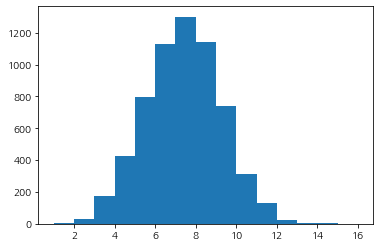

In [635]:
plt.hist( [len(words) for words in x_train1 ] ,bins=15)
plt.show()

## 워드 클라우드

In [579]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [576]:
import wordcloud
from wordcloud import WordCloud

In [639]:
train1_count = []
for i in range(len(train_token1)):
    train1_count.append(train_token1[i][0])
train1_count = sum(train1_count, [])

In [640]:
count1 = Counter(train1_count)
words1 = dict(count1.most_common())
words1

{'투자': 493,
 '증권': 455,
 '영업': 444,
 '금융': 356,
 '삼성': 324,
 '코스피': 317,
 '작년': 305,
 '하다': 268,
 '대출': 229,
 '주식': 222,
 '출시': 221,
 '실적': 219,
 '증가': 217,
 '상승': 207,
 '펀드': 204,
 '하락': 202,
 '한국': 199,
 '시장': 193,
 '기업': 187,
 '금리': 186,
 '만에': 186,
 '주택': 181,
 '은행': 181,
 '목표': 178,
 '대다': 176,
 '최대': 175,
 '전자': 165,
 '1분': 161,
 '이익': 159,
 '올해': 156,
 '규모': 154,
 '결정': 150,
 '상장': 150,
 '감소': 150,
 '으로': 147,
 'LG': 145,
 '2분': 144,
 '아파트': 143,
 '3분': 143,
 '현대': 141,
 '코스닥': 128,
 '거래': 126,
 'SK': 125,
 '달러': 124,
 '상품': 122,
 '1천': 119,
 '전망': 118,
 '증시': 117,
 '서울': 117,
 '사업': 115,
 '주가': 114,
 '서비스': 110,
 '계약': 106,
 'KT': 101,
 '확대': 101,
 '미국': 100,
 '최고': 100,
 '보다': 100,
 '전환': 99,
 '지원': 98,
 '환율': 98,
 '부동산': 98,
 '돌파': 96,
 '판매': 96,
 '회복': 95,
 '산업': 95,
 'NH': 94,
 '중국': 92,
 '분양': 92,
 '강세': 91,
 '성장': 91,
 '부터': 91,
 '공급': 90,
 '내년': 90,
 '해외': 89,
 '카카오': 89,
 'KB': 88,
 '매출': 88,
 '카드': 87,
 '그룹': 87,
 '대비': 87,
 '금투': 85,
 '배당': 84,
 '롯데': 83,
 '자산': 83,
 

In [641]:
wordcloud1 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words1)

Text(0.5, 1.0, '경제')

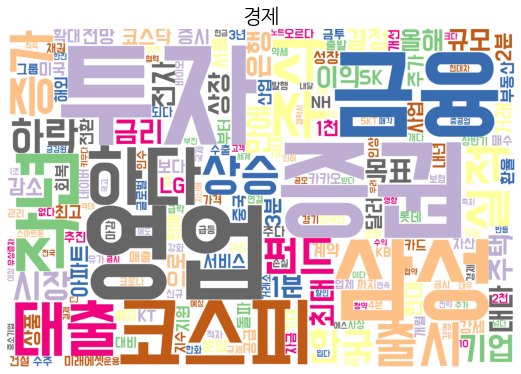

In [648]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('경제', size=20)


# 토픽 6 분석

In [608]:
print( train_token6[:2] )

[[['김영남', '민족', '위상', '과시', '뜨겁다', '분위기', '이다'], 6], [['적극', '행정', '추진', '전략', '성과', '공유', '대회', '참석', '이낙연', '총리'], 6]]


In [612]:
x_train6 = [ line[0] for line in train_token6 if len(line[0]) > 1]
y_train6 = np.array([ int(line[1]) for line in train_token6 if len(line[0]) > 1])

In [613]:
print( x_train6[:2] )
print( y_train6[:2] )

[['김영남', '민족', '위상', '과시', '뜨겁다', '분위기', '이다'], ['적극', '행정', '추진', '전략', '성과', '공유', '대회', '참석', '이낙연', '총리']]
[6 6]


In [616]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train6)
print(tokenizer.word_index)

{'대통령': 1, '북한': 2, '하다': 3, '박근혜': 4, '청와대': 5, '김정은': 6, '한국': 7, '민주': 8, '국회': 9, '여당': 10, '정부': 11, '평양': 12, '문재인': 13, '여야': 14, '정상회담': 15, '회의': 16, '남북': 17, '야당': 18, '없다': 19, '대표': 20, '으로': 21, '대북': 22, '장관': 23, '총리': 24, '의원': 25, '국민': 26, '되다': 27, '안철수': 28, '위원장': 29, '평화': 30, '논의': 31, '방문': 32, '후보': 33, '미국': 34, '제재': 35, '경제': 36, '선언': 37, '대화': 38, '회담': 39, '총선': 40, '합의': 41, '정상': 42, '정책': 43, '돼다': 44, '참석': 45, '오늘': 46, '미래': 47, '개혁': 48, '까지': 49, '정치': 50, '국민의당': 51, '인사': 52, '외교': 53, '원내대표': 54, '북핵': 55, '발사': 56, '국정': 57, '선거': 58, '있다': 59, '대회': 60, '북미': 61, '중국': 62, '사드': 63, '미사일': 64, '에서': 65, '남북정상회담': 66, '가능성': 67, '조국': 68, '대응': 69, '바른': 70, '안보': 71, '내일': 72, '탄핵': 73, '처리': 74, '도발': 75, '검찰': 76, '발언': 77, '받다': 78, '않다': 79, '협력': 80, '한미': 81, '이해찬': 82, '비핵화': 83, '준비': 84, '개헌': 85, '핵실험': 86, '주장': 87, '한반도': 88, '발표': 89, '대다': 90, '출마': 91, '논란': 92, '국가': 93, '지원': 94, '추진': 95, '협의': 96, '최고': 97, '황교안': 98, '검토'

In [617]:
len( tokenizer.word_index )

8448

8448개의 단어 사용

In [618]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [619]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 8448
2번 이하로 사용된 단어의 집합: 5131
2번 이하로 사용된 단어의 집합의 비율: 60.736268939393945
2번 이하로 사용된 단어의 출현 비율: 11.861796572091169


In [620]:
max_words = total_cnt - rare_cnt + 1
max_words

3318

In [621]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train6)
x_train6 = tokenizer.texts_to_sequences(x_train6)

In [624]:
print( x_train6[:2] )

[[666, 1218, 1219, 1774, 836, 227], [340, 1775, 95, 195, 281, 837, 60, 45, 282, 24]]


## 자료 크기 분석

In [634]:
print(f'최대 길이: { max(len(words) for words in x_train6) }')
print(f'평균 길이: { sum(len(words) for words in x_train6)/len(x_train6) }')

최대 길이: 14
평균 길이: 7.210167481843782


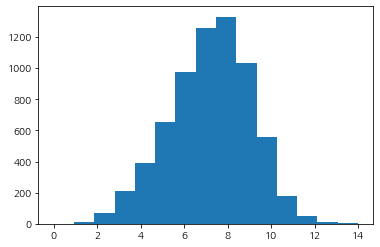

In [636]:
plt.hist( [len(words) for words in x_train6 ] ,bins=15)
plt.show()

## 워드 클라우드

In [644]:
train6_count = []
for i in range(len(train_token6)):
    train6_count.append(train_token6[i][0])
train6_count = sum(train6_count, [])

In [645]:
count6 = Counter(train6_count)
words6 = dict(count6.most_common())
words6

{'대통령': 1405,
 '북한': 1380,
 '하다': 1125,
 '박근혜': 676,
 '청와대': 417,
 '김정은': 374,
 '한국': 345,
 '민주': 322,
 '국회': 286,
 '여당': 274,
 '정부': 244,
 '평양': 234,
 '문재인': 232,
 '여야': 228,
 '정상회담': 220,
 '회의': 207,
 '남북': 204,
 '야당': 197,
 '없다': 193,
 '대표': 183,
 '으로': 181,
 '대북': 171,
 '장관': 169,
 '총리': 167,
 '의원': 160,
 '국민': 151,
 '되다': 143,
 '안철수': 136,
 '위원장': 134,
 '평화': 129,
 '논의': 128,
 '방문': 128,
 '후보': 126,
 '미국': 125,
 '제재': 124,
 '경제': 123,
 '선언': 123,
 '대화': 122,
 '회담': 121,
 '총선': 121,
 '합의': 119,
 '정상': 116,
 '정책': 113,
 '돼다': 111,
 '참석': 110,
 '오늘': 103,
 '미래': 102,
 '개혁': 101,
 '까지': 100,
 '정치': 100,
 '국민의당': 100,
 '인사': 99,
 '원내대표': 96,
 '외교': 96,
 '북핵': 94,
 '발사': 93,
 '국정': 93,
 '선거': 93,
 '있다': 93,
 '대회': 92,
 '북미': 91,
 '중국': 91,
 '사드': 90,
 '미사일': 89,
 '에서': 88,
 '남북정상회담': 88,
 '가능성': 86,
 '조국': 86,
 '대응': 85,
 '바른': 85,
 '안보': 84,
 '내일': 84,
 '탄핵': 84,
 '처리': 83,
 '도발': 82,
 '검찰': 82,
 '발언': 80,
 '받다': 79,
 '않다': 79,
 '협력': 77,
 '한미': 77,
 '이해찬': 76,
 '비핵화': 75,
 '준비': 74,
 

In [646]:
wordcloud6 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words6)

Text(0.5, 1.0, '정치')

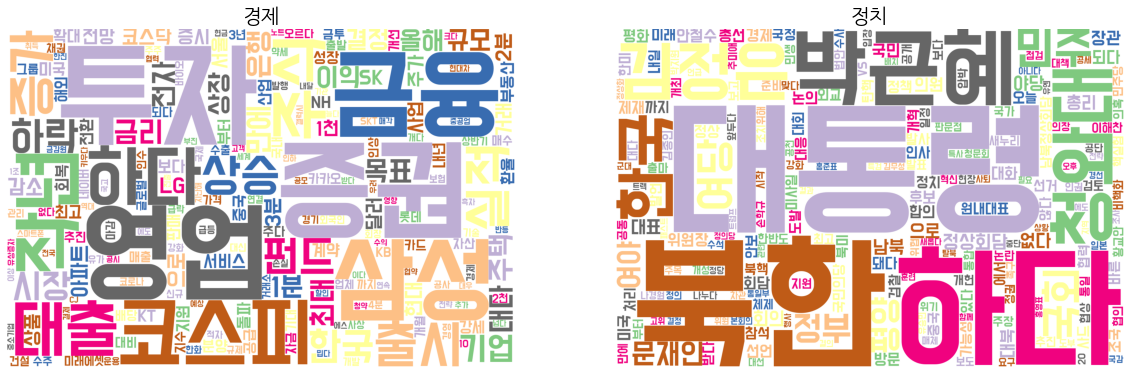

In [649]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('경제', size=20)


plt.subplot(1, 2, 2)
plt.imshow(wordcloud6)
plt.axis('off')
plt.title('정치', size=20)


하다..? 삭제 필요,,,